<h1> Programming for Physics <br> Lecture 12: Plots and Animations </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2012%20matplotlib.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
   

## matplotlib
The most popular packages for scientific plotting in python
   > "A picture is worth a thousand words" 

![matplotlib](https://towardsdatascience.com/wp-content/uploads/2020/10/1OAFEIg9w1XHyZk0xBud14A.png)

We can also create animations with matplotlib!

## Figure


   > "everything is an object"

A figure contains many objects. They can all be updated in place. 

Steps to make a figure:

0. import the packages/modules
1. prepare data
2. plot
3. add labels
4. add legend
5. fine tuning


![figure](https://tacaswell.github.io/matplotlib/_images/anatomy.png)

## Example: 

Plot sin(x) and cos(x) function for 0< x < 2 $\pi$  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_data = np.linspace(0,2*np.pi,100) #one hundred data point
sin_data = np.sin(x_data)
cos_data = np.cos(x_data)

(-0.3141592653589793,
 6.5973445725385655,
 -1.099867834057569,
 1.0999937063836938)

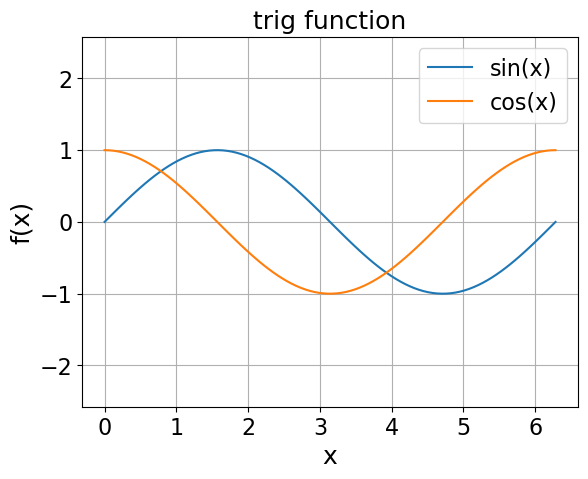

In [3]:
plt.plot(x_data, sin_data)
plt.plot(x_data, cos_data)
xlabel = plt.xlabel('x',fontsize=18) #set xlabel and return the xlabel object
ylabel = plt.ylabel('f(x)', fontsize=18) #set ylabel and return the ylabel object
title = plt.title('trig function',fontsize=18) #set title and return the title object
legend = plt.legend(('sin(x)','cos(x)'),fontsize=16) #set legend and return the legend object
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
fig = plt.gcf() #get current figure object
ax = plt.gca() #get current axes object
ax.axis('equal') #set the scale for both axis to be same

__Each component in the figure is an object belonging to a specific class__


In [4]:
print(type(fig))
print(type(ax))
print(type(xlabel))
print(type(legend))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.legend.Legend'>


__These objects can be updated in place__

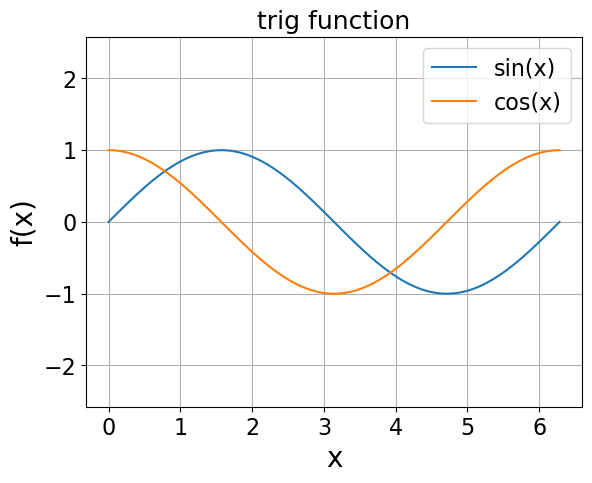

In [5]:
xlabel.set_fontsize(20)
ylabel.set_fontsize(20)
fig

### Line Object

We can get the line objects using the get_lines method of axis

it returns a __list__ of line object

then we can change the curve by using set_data method of lines

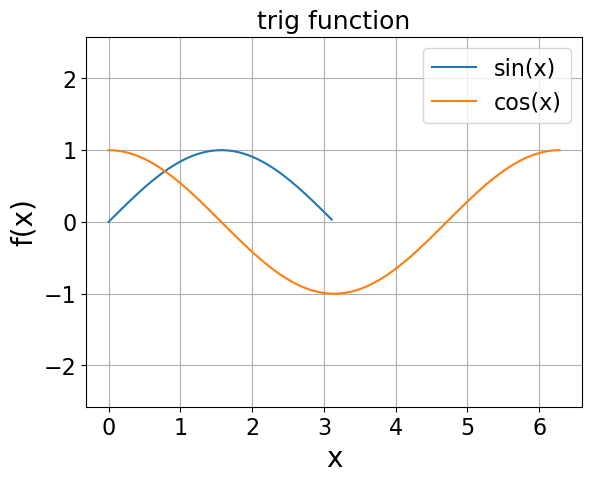

In [6]:
lines = ax.get_lines()  # get a LIST of all line objects in the axes
line1 = lines[0]
line1.set_data(x_data[0:50],sin_data[0:50])
fig # the figure now is updated in place!

### Patch Object

We can add patches to the figure to make it more interesting

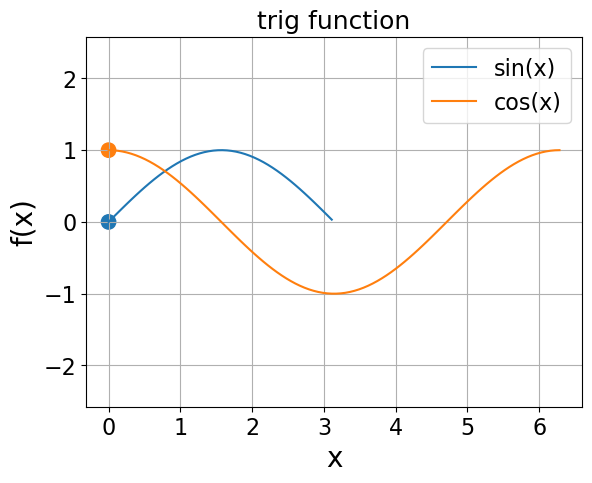

In [7]:
circle1 = plt.Circle((0,0),radius=0.1,color='tab:blue')
circle2 = plt.Circle((0,1),radius=0.1, color='tab:orange')
ax.add_patch(circle1)
ax.add_patch(circle2)
fig

__Take Home Message: Everything on figure can be modified IN PLACE__

You don't have to remember how. Just google it.


---

## Animation

The key idea: update the figure for each frame and show the figure frame by frame

Write a function to update the figure based on the frame index

In [8]:
def draw_frame(frame_index):
    lines[0].set_data(x_data[0:frame_index], sin_data[0:frame_index])
    lines[1].set_data(x_data[0:frame_index], cos_data[0:frame_index])
    circle1.center = x_data[frame_index],sin_data[frame_index]
    circle2.center = x_data[frame_index],cos_data[frame_index]


In [9]:
draw_frame(40)

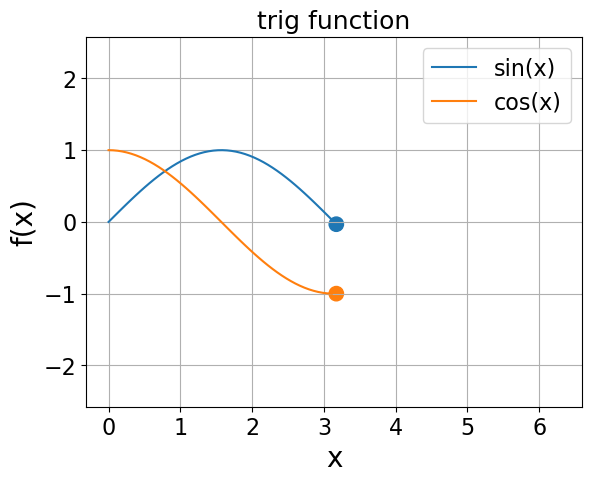

In [10]:
draw_frame(50)
fig

### Method I

Put the draw_frame() function in a loop and show the figure in each iteration

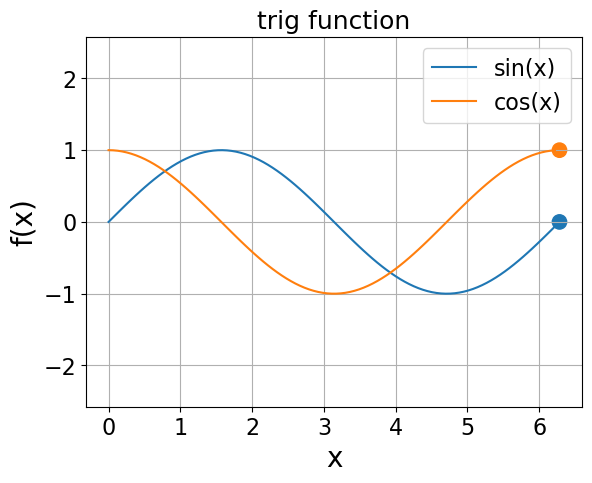

In [11]:
import IPython
import time
for i_frame in range(100):
    draw_frame(i_frame)
    IPython.display.display(fig) #show the fig after it is updated
    IPython.display.clear_output(wait=True) #clear the figure once a new figure is shown
    time.sleep(0.005) #wait for 0.01 sec between each iteration

### Method II (preferred)

Matplotlib has an animation module that does this for you

In [12]:
import matplotlib.animation as animation
anim=animation.FuncAnimation(fig, draw_frame, frames=100, interval=20) 
# the first argument is the figure object
# the second argument is the function updates the figure for each frame
# the third argument is the total number of frames
# the fourth interval is the time interval between two frames in milliseconds

In [13]:
anim

In [14]:
IPython.display.HTML(anim.to_jshtml())

In [15]:
IPython.display.HTML(anim.to_html5_video()) #requires installing ffmpeg to work

## Now let's try a physics example: Harmonic Oscillator

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/water_spring.png?raw=true' style='height:400px' height=400>

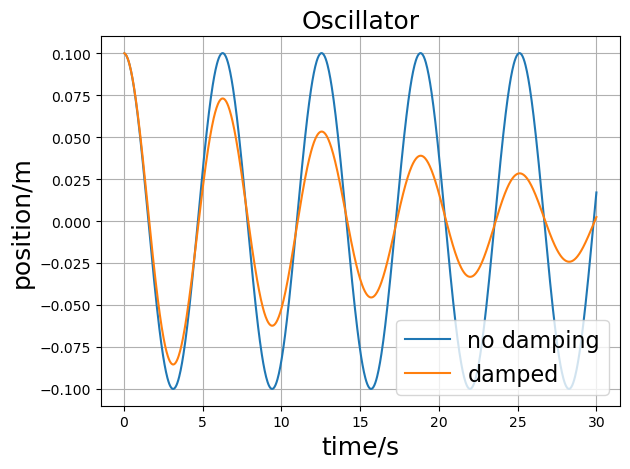

In [17]:
import physics as phy

ball1=phy.Ball(x=0.1)
phy.motion(t_max=30,num_step=1000,ball=ball1,f_a=lambda x,v:-x)
ball2=phy.Ball(x=0.1)
phy.motion(t_max=30,num_step=1000,ball=ball2,f_a=lambda x,v:-x-0.1*v)
plt.plot(ball1.time_list, ball1.pos_list)
plt.plot(ball2.time_list, ball2.pos_list)
fig=plt.gcf()
ax=plt.gca()
plt.xlabel('time/s',fontsize=18)
plt.ylabel('position/m',fontsize=18)
plt.title('Oscillator',fontsize=18)
plt.legend(('no damping','damped'),fontsize=16)
plt.grid(True)
plt.tight_layout()


In [18]:
fig.savefig('oscillator.png')

## animate the motion of earth around the sun

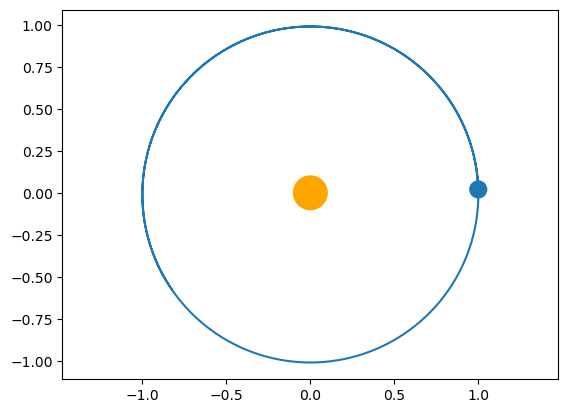

In [1]:
import physics as phy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython
ball = phy.Ball(x=(1, 0), v=(0, 1))
phy.motion(t_max=10, num_step=500, ball=ball, f_a=lambda x, v: -np.array(x)/np.linalg.norm(x)**3)
x_data, y_data = zip(*ball.pos_list)
trajectory = plt.plot(x_data, y_data) # plot the trajectory of the ball and return the line object
plt.axis('equal')
fig = plt.gcf()
ax = plt.gca()
sun = plt.Circle((0, 0), 0.1, color='orange') # draw the central mass
ax.add_patch(sun)
earth = plt.Circle((x_data[0], y_data[0]), 0.05, color='tab:blue') # draw the orbiting mass
ax.add_patch(earth)

In [31]:
def draw_frame(frame_index):
    index = frame_index*5 # speed up the animation by skipping frames
    if index >= len(x_data):
        index = len(x_data) - 1 # prevent index out of range
    earth.center = x_data[index], y_data[index]
    trajectory[0].set_data(x_data[0:index], y_data[0:index])

In [32]:
anim=animation.FuncAnimation(fig, draw_frame, frames=100, interval=20)
IPython.display.HTML(anim.to_jshtml())